In [78]:
from matplotlib import pyplot as plt
from numba import jit, guvectorize, float64
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [181]:
global K, r
E = 1
b = 10
delta = 0.01
start = 6

@guvectorize([(float64[:],float64[:])], '(a)->(a)')
def f(x,res):
    for i in range(res.shape[0]):
        res[i] = x[i] * (b*x[i]/(1+x[i]**2)- E)

In [182]:
axis = np.arange(0,1.5*b/E,delta)

In [183]:
def cobweb(start,f,itr):
    seq = [start]
    for i in range(itr):
        seq.append(f([seq[-1]])[0])
    return seq

In [184]:
L = cobweb(start,f,100)
xweb,yweb = [],[]
for i in range(len(L)-1):
    if L[i] > 2*b/E:
        break
    xweb.append(L[i])
    xweb.append(L[i])
    yweb.append(L[i])
    yweb.append(L[i+1])

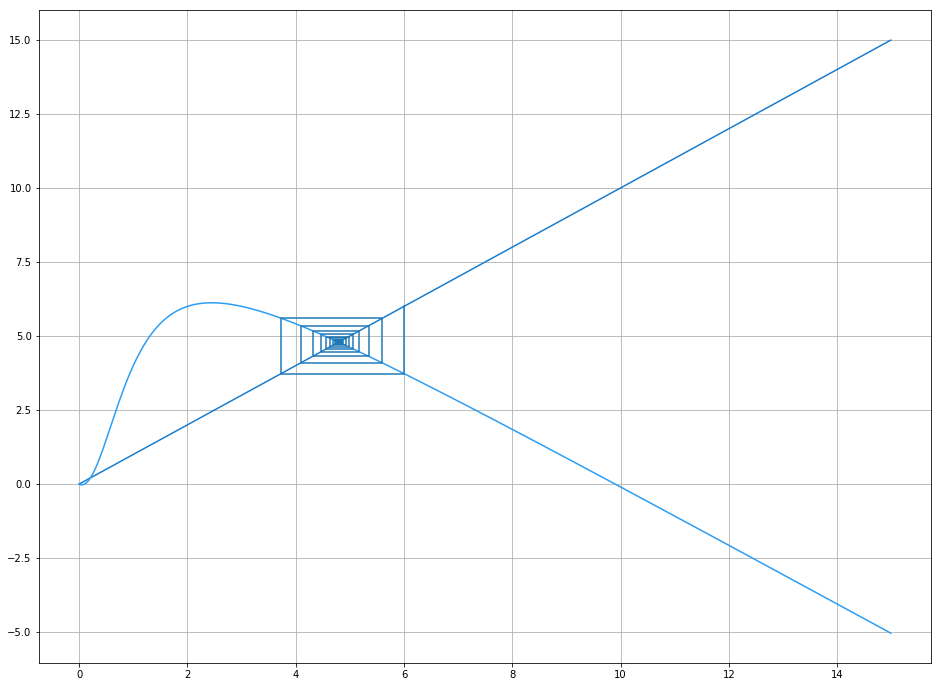

In [185]:
fig = plt.figure(figsize=[16,12])
ax = fig.gca()
ax.plot(axis, axis, color = '#187bcd')
ax.plot(axis,f(axis), color = '#2a9df4')
ax.plot(xweb,yweb,1)
plt.grid()
plt.show()